In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


#change1___added libraries
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#change2_creating pipeline
from sklearn.pipeline import Pipeline

#selecting a set of best features
from sklearn.feature_selection import SelectKBest, f_classif,chi2,mutual_info_regression, f_regression, SelectPercentile

# to check correlation between features
from pandas import DataFrame, read_csv

In [73]:
#load train and test
train=pd.read_csv('./CS6301-S19-MidTermProject/bb_2000s_train.csv',delimiter=',',header=0)
test=pd.read_csv('./CS6301-S19-MidTermProject/bb_2000s_test.csv',delimiter=',',header=0)

In [74]:
train_y=train.iloc[:,-1]
#train_x=train.iloc[:,3:-1]
train_x=train.iloc[:,[3,4,6,7,8,9,10,11,12,13,14]]
test=test.iloc[:,[0,1,3,4,5,6,7,8,9,10,11]]

#change2____added below line
#train_norm_x = normalize(train_x, axis =0)

In [75]:
#train, test and validation partition
tst_frac=0.3


#change3_____train_x changed to train_norm_x
#X_trn, X_tst, y_trn, y_tst = train_test_split(train_x, train_y, test_size=tst_frac,random_state=42)
X_trn, X_tst, y_trn, y_tst = train_test_split(train_x, train_y, test_size=tst_frac,random_state=42)

  
#X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac,random_state=42)

In [76]:
test[0:4]

,PreviousHit,Danceability,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1,0.663,7,-4.557,1,0.0356,0.22900,0.000,0.2950,0.849,98.001
1,0,0.408,2,-4.675,1,0.0573,0.00251,0.908,0.3430,0.131,187.526
2,0,0.657,11,-7.104,0,0.0757,0.12400,0.000,0.0932,0.885,97.862
3,0,0.356,8,-11.852,1,0.0454,0.02200,0.760,0.1080,0.147,169.956


In [77]:
train_x[0:4]

,PreviousHit,Danceability,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1,0.470,9,-7.976,1,0.0308,0.490000,0.000035,0.378,0.376,165.339
1,0,0.540,1,-5.221,1,0.0246,0.266000,0.000000,0.204,0.285,135.900
2,0,0.810,4,-2.672,0,0.2410,0.130000,0.000000,0.313,0.299,87.328
3,1,0.411,8,-2.522,0,0.0583,0.000264,0.001480,0.371,0.649,165.981


In [78]:
corr = X_trn.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(1)

,PreviousHit,Danceability,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
PreviousHit,1,0.1,0.01,0.2,-0.0005,-0.08,-0.05,-0.2,-0.09,0.06,0.004
Danceability,0.1,1,-0.02,0.2,-0.1,0.1,-0.1,-0.3,-0.09,0.6,-0.2
Key,0.01,-0.02,1,0.02,-0.1,0.07,-0.06,-0.02,0.05,-0.0009,0.002
Loudness,0.2,0.2,0.02,1,-0.03,0.01,-0.6,-0.4,0.05,0.3,0.2
Mode,-0.0005,-0.1,-0.1,-0.03,1,-0.07,0.04,-0.04,-0.04,-0.07,0.03
Speechiness,-0.08,0.1,0.07,0.01,-0.07,1,-0.009,-0.1,0.3,0.1,-0.06
Acousticness,-0.05,-0.1,-0.06,-0.6,0.04,-0.009,1,0.2,-0.03,-0.2,-0.2
Instrumentalness,-0.2,-0.3,-0.02,-0.4,-0.04,-0.1,0.2,1,-0.005,-0.3,-0.04
Liveness,-0.09,-0.09,0.05,0.05,-0.04,0.3,-0.03,-0.005,1,0.03,0.02
Valence,0.06,0.6,-0.0009,0.3,-0.07,0.1,-0.2,-0.3,0.03,1,-0.0009


In [79]:
normalize=Normalizer()
min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pandas.DataFrame(x_scaled)


In [80]:
#---------------------------------------------SVM-------------------------------------------------------------
from sklearn.svm import SVC

In [81]:
gamma_range = np.arange(-3.0, 3.0, 1.0)
gamma_values = np.power(10.0, gamma_range)
C_range = np.arange(-2.0, 5.0, 1.0)
C_values = np.power(10.0, C_range)

SVMmodels = dict()
trnErr = dict()
valErr = dict()



#fselect=SelectKBest(f_classif,k=9)

print ('------------------Training errors C vs Gamma----------------------')
print ('\n')
print ('                   Gamma values                        ')
print ('\n')
print ('\t',end='')
print('\t'.join(map(str,gamma_values)))
for C in C_values:
    print (C)
    for G in gamma_values:
        clf= SVC(C=C,kernel='rbf',gamma=G)
        SVCclf = Pipeline([('normalization', normalize),
                           ('min_max_scaler', min_max_scaler),
                           ('SVM', clf)])
        SVMmodels[(C,G)]=SVCclf.fit(X_trn,y_trn)
        valErr[(C,G)]=1-np.mean(cross_val_score(SVCclf,X_trn,y_trn,cv=10))
        trnErr[(C,G)]=1-SVCclf.score(X_trn,y_trn)
        
        print ('\t'+str(np.round(trnErr[(C,G)],decimals=5)),end='')
    print ('\n')   


print ('\n\n\n')
print ('------------------Validation errors  C vs Gamma----------------------')
print ('\n')
print ('                   Gamma values                        ')
print ('\n')
print ('\t',end='')
print('\t'.join(map(str,gamma_values)))
for C in C_values:
    print (C)
    for G in gamma_values:
        print ('\t'+str(np.round(valErr[(C,G)],decimals=5)),end='')
    print ('\n') 
    
temp=min(valErr.values())
best_params=[param for param,score in valErr.items() if score==temp]

print ('\n\n\n')
print ('best set of values for C and gamma respectively are=')
print (best_params)
print ('Test error for the best C and gamma is =')
print (1-SVMmodels[best_params[0]].score(X_tst,y_tst))

------------------Training errors C vs Gamma----------------------


                   Gamma values                        


	0.001	0.01	0.1	1.0	10.0	100.0
0.01
	0.38776	0.38776	0.38776	0.38776	0.387	0.38776

0.1
	0.38776	0.38776	0.33409	0.25321	0.25094	0.38776

1.0
	0.38776	0.32653	0.25321	0.25321	0.23961	0.07181

10.0
	0.32502	0.25321	0.25321	0.25246	0.16175	0.00756

100.0
	0.25321	0.25321	0.25246	0.23054	0.09751	0.0

1000.0
	0.25321	0.25321	0.2517	0.20786	0.04082	0.0

10000.0
	0.25321	0.25246	0.23658	0.15797	0.01361	0.0





------------------Validation errors  C vs Gamma----------------------


                   Gamma values                        


	0.001	0.01	0.1	1.0	10.0	100.0
0.01
	0.38775	0.38775	0.38775	0.38775	0.38775	0.38775

0.1
	0.38775	0.38775	0.35377	0.25322	0.25323	0.38775

1.0
	0.38775	0.35224	0.25322	0.25398	0.25549	0.30382

10.0
	0.35148	0.25322	0.25322	0.25474	0.26081	0.32873

100.0
	0.25322	0.25322	0.25398	0.2502	0.3024	0.331

1000.0
	0.25322	0.25322	0.25625	0

In [82]:
#High value of C suggests that the model is highly non-linear

In [83]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier

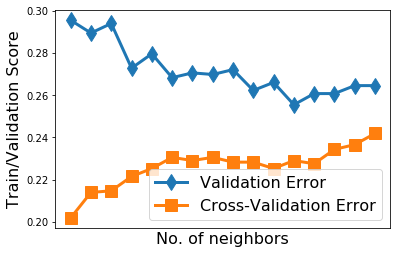

best model is one with number of neighbors=
[16]
Test error corresponding to best_k is :
0.198943661971831


In [84]:
#change______________________________________________________
#k_list=[1,5,11,15,21]
k_range = np.arange(5, 21, 1)

kModels=dict()
#kValErr=dict()
kCValErr=dict()
kTrnErr=dict()

#change______________________________________________________
#for k in k_list:
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    KNNclf= Pipeline([('normalization', normalize),
                      ('min_max_scaler', min_max_scaler),
                       ('KNN', neigh)])
    kModels[k]=KNNclf.fit(X_trn,y_trn)
    #kValErr[k]=1-KNNclf.score(X_val,y_val)
    kCValErr[k] = 1- np.mean(cross_val_score(KNNclf,X_trn,y_trn, cv=10))
    kTrnErr[k]=1-KNNclf.score(X_trn,y_trn)



plt.figure()
#plt.plot(kValErr.keys(), kValErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(kCValErr.keys(), kCValErr.values(), marker='d', linewidth=3, markersize=12)
plt.plot(kTrnErr.keys(), kTrnErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('No. of neighbors', fontsize=16)
plt.ylabel('Train/Validation Score', fontsize=16)
plt.xticks(list(kValErr.keys()), fontsize=12)
plt.legend(['Validation Error','Cross-Validation Error', 'Train Error'], fontsize=16)
#change__________________removed the below line
#plt.axis([0, 22, -1, 1])

plt.show()

#temp=min(kValErr.values())
temp=min(kCValErr.values())
#best_k=[param for param,score in kValErr.items() if score==temp]
best_k=[param for param,score in kCValErr.items() if score==temp]
print ('best model is one with number of neighbors=')
print (best_k)

print ('Test error corresponding to best_k is :')
print (1-kModels[best_k[0]].score(X_tst,y_tst))

In [85]:
#change______________
k_best = best_k[0]
clf = KNeighborsClassifier(n_neighbors=k_best, algorithm='kd_tree')
knmodel=clf.fit(X_trn,y_trn) 
print (1-knmodel.score(X_tst,y_tst))

predict_proba = knmodel.predict_proba(X_tst)
fpr_kn, tpr_kn, thresholds_kn = metrics.roc_curve(y_tst, predict_proba[:,1])
roc_auc_kn = metrics.auc(fpr_kn, tpr_kn)

0.352112676056338


In [86]:
#random forest
from sklearn.ensemble import RandomForestClassifier

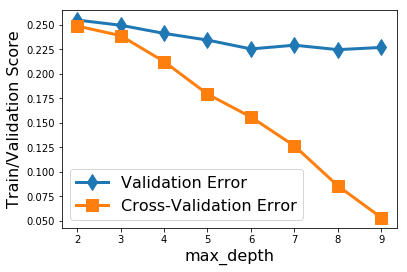

best model is one with max_depth=
[8]
Test error corresponding to this model is :
0.19190140845070425


In [87]:
d_range = np.arange(2, 10, 1)

rfModels=dict()
#rfValErr=dict()
rfCValErr=dict()
rfTrnErr=dict()


for d in d_range:
    clf = RandomForestClassifier(n_estimators=100, max_depth=d,random_state=0,max_features=4)
    RFclf= Pipeline([('normalization', normalize),
                     ('min_max_scaler', min_max_scaler),
                       ('RF', clf)])
    rfModels[d]=RFclf.fit(X_trn,y_trn)
    rfTrnErr[d]=1-RFclf.score(X_trn,y_trn)
    rfCValErr[d] = 1- np.mean(cross_val_score(RFclf,X_trn,y_trn, cv=10))
    #rfValErr[d]=1-RFclf.score(X_val,y_val)

plt.figure()
#plt.plot(rfValErr.keys(), rfValErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(rfCValErr.keys(), rfCValErr.values(), marker='d', linewidth=3, markersize=12)
plt.plot(rfTrnErr.keys(), rfTrnErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('Train/Validation Score', fontsize=16)
#plt.xticks(list(rfValErr.keys()), fontsize=12)
plt.legend(['Validation Error','Cross-Validation Error', 'Train Error'], fontsize=16)
#change____________________________________________________________
#plt.axis([1, 11, 0, 0.5])

plt.show()

#temp=min(rfValErr.values())
temp=min(rfCValErr.values())
#best_d=[param for param,score in rfValErr.items() if score==temp]
best_d=[param for param,score in rfCValErr.items() if score==temp]
print ('best model is one with max_depth=')
print (best_d)

print ('Test error corresponding to this model is :')
print (1-rfModels[best_d[0]].score(X_tst,y_tst))

In [88]:
clf = RandomForestClassifier(n_estimators=100, max_depth=best_d[0],random_state=0,max_features=4)
rfmodel=clf.fit(X_trn,y_trn) 
print (1-rfmodel.score(X_tst,y_tst))

predict_proba = rfmodel.predict_proba(X_tst)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_tst, predict_proba[:,1])
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

0.1901408450704225


In [89]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [90]:
clf=GaussianNB()
NBclf=Pipeline([('normalization', normalize),
                ('min_max_scaler', min_max_scaler),
                       ('NB', clf)])
nbmodel=NBclf.fit(X_trn,y_trn)
nbTrnErr=1-NBclf.score(X_trn,y_trn)
#nbValErr=1-NBclf.score(X_val,y_val)
nbCValErr=1- np.mean(cross_val_score(NBclf,X_trn,y_trn, cv=10))
print (nbCValErr)

0.42028935976304405


In [91]:
#change_____________________________
predict_proba = nbmodel.predict_proba(X_tst)

fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(y_tst, predict_proba[:,1])

roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

In [92]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [93]:
clf = LogisticRegression(random_state=0, solver='liblinear')
LRclf=Pipeline([('normalization', normalize),
                ('min_max_scaler', min_max_scaler),
                       ('LR', clf)])
lrmodel=LRclf.fit(X_trn,y_trn)
lrTrnErr=1-LRclf.score(X_trn,y_trn)
#lrValErr=1-LRclf.score(X_val,y_val)
lrCValErr=1- np.mean(cross_val_score(LRclf,X_trn,y_trn, cv=10))
print (lrCValErr)

0.25473912052859427


In [94]:
#change_____________________________
predict_proba = lrmodel.predict_proba(X_tst)

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_tst, predict_proba[:,1])

roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

In [95]:
#Boosting
from xgboost import XGBClassifier

In [96]:
clf=XGBClassifier()
XGBclf=Pipeline([('normalization', normalize),
                 ('min_max_scaler', min_max_scaler),
                       ('XGB', clf)])
xgbmodel=XGBclf.fit(X_trn,y_trn)
xgbTrnErr=1-XGBclf.score(X_trn,y_trn)
#xgbValErr=1-XGBclf.score(X_val,y_val)
xgbCValErr=1- np.mean(cross_val_score(XGBclf,X_trn,y_trn, cv=10))
print (xgbCValErr)

0.2252961950330371


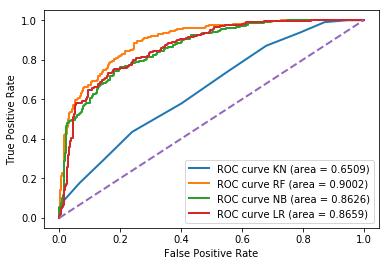

In [97]:
#change___________________________________
from sklearn import metrics

plt.figure()

plt.plot(fpr_kn, tpr_kn, lw=2, label = 'ROC curve KN (area = %0.4f)'% roc_auc_kn)
plt.plot(fpr_rf, tpr_rf, lw=2, label = 'ROC curve RF (area = %0.4f)'% roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, lw=2, label = 'ROC curve NB (area = %0.4f)'% roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, lw=2, label = 'ROC curve LR (area = %0.4f)'% roc_auc_lr)

plt.plot([0,1],[0,1],lw=2,linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [98]:
print ("Cross Validation Errors")
print (valErr[(best_params[0])])
print (kCValErr[best_k[0]])
print (rfCValErr[best_d[0]])
print (nbCValErr)
print (lrCValErr)

Cross Validation Errors
0.2501993620414672
0.25549100022784244
0.22450444292549554
0.42028935976304405
0.25473912052859427


In [99]:
print ("Test Errors")
print (1-SVMmodels[best_params[0]].score(X_tst,y_tst))
print (1-kModels[best_k[0]].score(X_tst,y_tst))
print (1-rfModels[best_d[0]].score(X_tst,y_tst))
print (1-NBclf.score(X_tst,y_tst))
print (1-LRclf.score(X_tst,y_tst))

Test Errors
0.19542253521126762
0.198943661971831
0.19190140845070425
0.37676056338028174
0.19190140845070425
